In [2]:
import pandas as pd
import numpy as np

## 1. Load Data

In [3]:
df = pd.read_csv(filepath_or_buffer= "Mall_Customers.csv")

In [6]:
df.head(n = 10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


## 2. Transform Data

In [10]:
df.rename(columns= {"CustomerID": "id", "Spending Score (1-100)":"score",
                   "Annual Income (k$)":"income"}, inplace = True)

In [11]:
df.columns

Index(['id', 'Gender', 'Age', 'income', 'score'], dtype='object')

In [ ]:
df_new = df.iloc[5:15 ,1:3 ]
df_new

In [ ]:
df_new = df.loc[190:200, ["income", "Age"] ]
df_new

In [ ]:
df_new  = df.sort_values(by = ["income","Gender"], ascending= [False, True])
df_new

## 3. Visualize Data

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline

### What is the relationship between Age of a customer and Spending score

Text(0.5, 1.0, 'Age Vs Spending Score')

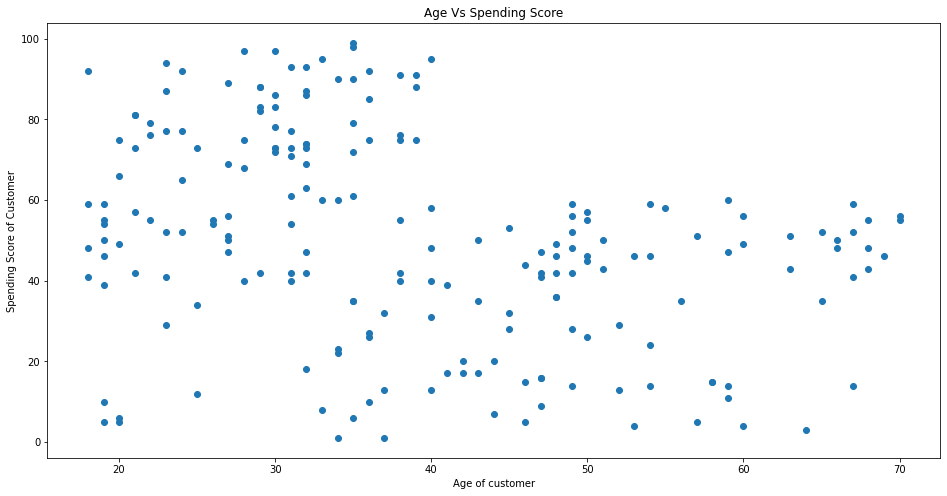

In [24]:
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
ax.scatter(x = df["Age"], y = df["score"])
ax.set_xlabel("Age of customer")
ax.set_ylabel("Spending Score of Customer")
ax.set_title("Age Vs Spending Score")

### Create Means across Gender -> Males and Females
- Plot means of the gender using Bar chart

In [25]:
means = df.groupby("Gender").mean()
means

,id,Age,income,score
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [27]:
means.index

Index(['Female', 'Male'], dtype='object', name='Gender')

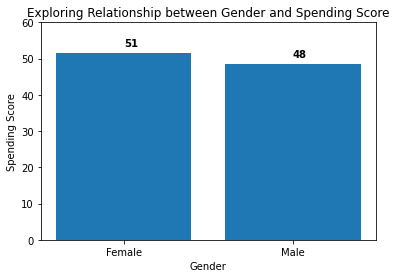

In [38]:
fig, ax = plt.subplots()
# fig.set_figheight(6)
ax.bar(x = means.index, height = means["score"])
ax.set_title("Exploring Relationship between Gender and Spending Score")
ax.set_xlabel("Gender")
ax.set_ylabel("Spending Score")
ax.set_ylim(top = 60)
for i, v in enumerate(means['score']):
    ax.text(i, v + 2, s = int(v), color='black', fontweight='bold')

## 4. Results